In [3]:
# Import libs
from dotenv import load_dotenv # type: ignore
import os
from googleapiclient.discovery import build
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load .env file
load_dotenv()

True

In [4]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

In [5]:
# Get environment variables
api_key = os.getenv('GOOGLE_API_KEY')
sheet_id = os.getenv('GOOGLE_SHEET_ID')
range_name = os.getenv('RANGE_NAME')

# Google service account file
SERVICE_ACCOUNT_FILE = 'credentials.json'

In [6]:
# Develop applications

try:
    # Authenticate using service account
    creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    # Build the service
    service = build('sheets', 'v4', credentials=creds)

    # Call API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=sheet_id, range=range_name).execute()
    values = result.get('values', [])

    # Check if there are values
    if not values:
        print('No data found.')
    else:
        print('Data found:')
        for row in values[:10]:
            print(row)

except Exception as e:
    print(f"An error occurred: {e}")

Data found:
['Data', 'Hora', 'Categoria', 'Tipo_de_gasto', 'Fonte', 'Sub_fonte', 'Local', 'Item', 'Descricao_item', 'Valor_unitario', 'Quantidade', 'Valor_total']
[]
[]
['30/01/2026', '00:00:00', 'Educacao', 'Fixo', 'Credito', 'NuBank', 'GitHub', 'Assinatura mensal', 'Copilot', ' R$  51,99 ', '1', ' R$  51,99 ']
[]
['30/01/2026', '00:00:00', 'Trabalho', 'Fixo', 'Debito', 'Dinheiro', 'Governo Federal', 'Renegociacao', 'DAS MEI', ' R$  65,00 ', '1', ' R$  65,00 ']
[]
['20/01/2026', '00:00:00', 'Saude', 'Fixo', 'Debito', 'Dinheiro', 'Unimed Marilia', 'Plano de Saude', 'Participativo; Municipal; Basico; 50%; Desconto 20%', ' R$  367,04 ', '0,8', ' R$  293,63 ']
[]
['20/01/2026', '00:00:00', 'Trabalho', 'Fixo', 'Debito', 'Dinheiro', 'Governo Federal', 'Mensalidade', 'MEI; Mensalidade', ' R$  81,90 ', '1', ' R$  81,90 ']


In [7]:
# Transform list to DataFrame
df = pd.DataFrame(values[1:], columns=values[0])

# Drop rows with all columns empty
df.dropna(how='all', inplace=True)

df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time
df['Valor_unitario'] = df['Valor_unitario'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)
df['Quantidade'] = df['Quantidade'].str.replace('.', '').str.replace(',', '.').astype(float)
df['Valor_total'] = df['Valor_total'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)

# filter 'Data' in 2025
df = df[df['Data'].dt.year == 2025]

display(df)

,Data,Hora,Categoria,Tipo_de_gasto,Fonte,Sub_fonte,Local,Item,Descricao_item,Valor_unitario,Quantidade,Valor_total
40,2025-12-31,00:00:00,Educacao,Fixo,Credito,NuBank,GitHub,Assinatura mensal,Copilot,51.99,1.0,51.99
42,2025-12-31,00:00:00,Trabalho,Fixo,Debito,Dinheiro,Governo Federal,Renegociacao,DAS MEI,65.00,1.0,65.00
44,2025-12-20,00:00:00,Saude,Fixo,Debito,Dinheiro,Unimed Marilia,Plano de Saude,Participativo; Municipal; Basico; 50%; Descont...,367.04,0.8,293.63
46,2025-12-20,00:00:00,Trabalho,Fixo,Debito,Dinheiro,Governo Federal,Mensalidade,MEI; Mensalidade,81.90,1.0,81.90
48,2025-12-17,00:00:00,Assinatura,Fixo,Debito,Dinheiro,Vivo,Plano de Celular,Controle 12GB; +3GB Bonus Debito Automatico; +...,75.00,1.0,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2025-01-04,12:38:00,Variados,Variavel,Credito,Santander,Loja Pinacoteca,Marca Pagina,Pinacoteca; Unidade,2.00,8.0,16.00
1793,2025-01-04,12:38:00,Variados,Variavel,Credito,Santander,Loja Pinacoteca,Postais,Almeida Junior; Unidade,3.00,2.0,6.00
1794,2025-01-04,12:38:00,Lazer,Variavel,Credito,Santander,Cafe Pinacoteca,Cafe Expresso,Curto,11.30,1.0,11.30
1795,2025-01-04,09:14:00,Transporte,Variavel,Credito,NuBank,Uber,Viajem,Sao Paulo; SP; De: Carrao; Para: Bom Retiro,42.07,1.0,42.07


In [8]:
tipo_de_gast_collors = {
    'Fixo': '#1C94D9',
    'Parcelado': '#D9481C',
    'Variavel': '#C9D91C',
    'Investimento': '#1CD95F',
    'Outro': 'gray'
}

In [23]:
def plot_expense_type(tipo_de_gasto, data):
    """
    Plot bar chart for a specific expense type across months with cumulative mean trend line.
    
    Parameters:
    tipo_de_gasto (str): The expense type to plot ('Fixo', 'Parcelado', 'Variavel', 'Investimento', 'Outro')
    data (DataFrame): The DataFrame containing the financial data with columns: 'Data', 'Tipo_de_gasto', 'Valor_total'
    """
    data = data.copy()
    data['Month'] = data['Data'].dt.to_period('M')
    grouped_df = data.groupby(['Month', 'Tipo_de_gasto'])['Valor_total'].sum().reset_index()
    grouped_df['Month_str'] = grouped_df['Month'].astype(str)

    filtered_df = grouped_df[grouped_df['Tipo_de_gasto'] == tipo_de_gasto].copy()
    filtered_df = filtered_df.sort_values('Month_str', ascending=True)
    
    if filtered_df.empty:
        print(f"No data found for expense type: {tipo_de_gasto}")
        return
    
    color = tipo_de_gast_collors.get(tipo_de_gasto, 'gray')
    filtered_df['Cumulative_Mean'] = filtered_df['Valor_total'].expanding().mean()
    
    plt.figure(figsize=(15, 5))
    
    plt.plot(filtered_df['Month_str'], filtered_df['Cumulative_Mean'], 
             color='#000000', alpha=0.5, marker='o', linewidth=2, label='Cumulative Mean')
    plt.bar(filtered_df['Month_str'], filtered_df['Valor_total'], color=color, alpha=1.0)
    
    plt.title(f'Total Value for {tipo_de_gasto} per Month', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Value (R$)', fontsize=12)
    
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    )
    
    for index, value in enumerate(filtered_df['Valor_total']):
        formatted_value = f'R$ {value:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
        plt.text(index, value * 1.05, formatted_value, ha='center', va='bottom', fontsize=9)

    max_value = max(filtered_df['Valor_total'].max(), filtered_df['Cumulative_Mean'].max())
    plt.ylim(0, max_value * 1.2)
    
    plt.xticks(rotation=45, ha='right')
    # plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

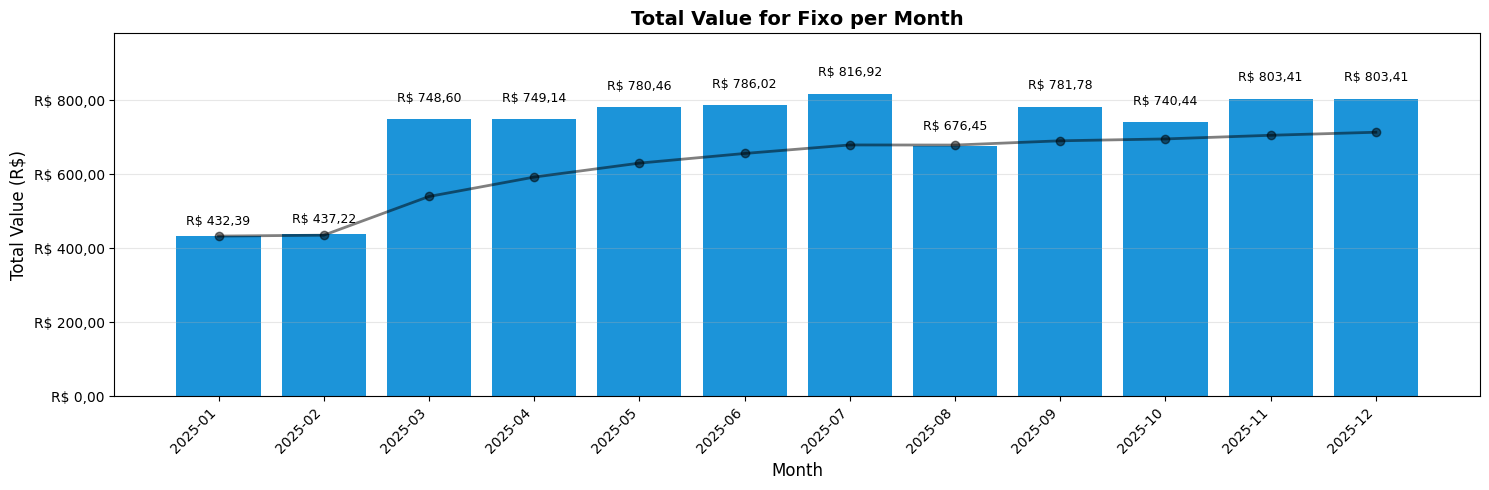

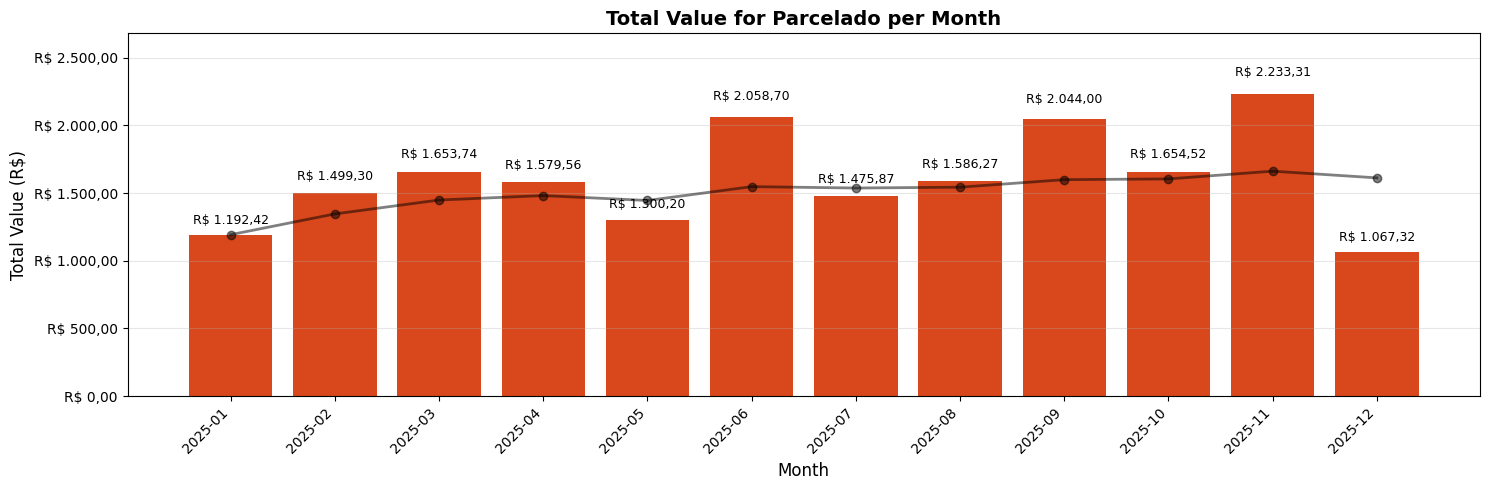

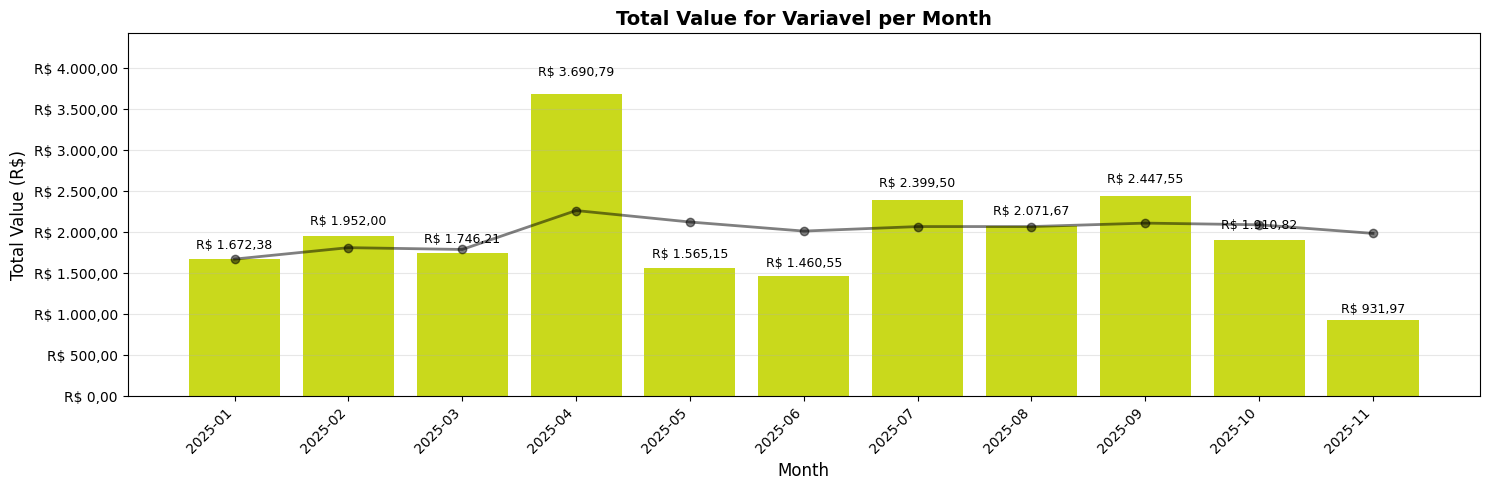

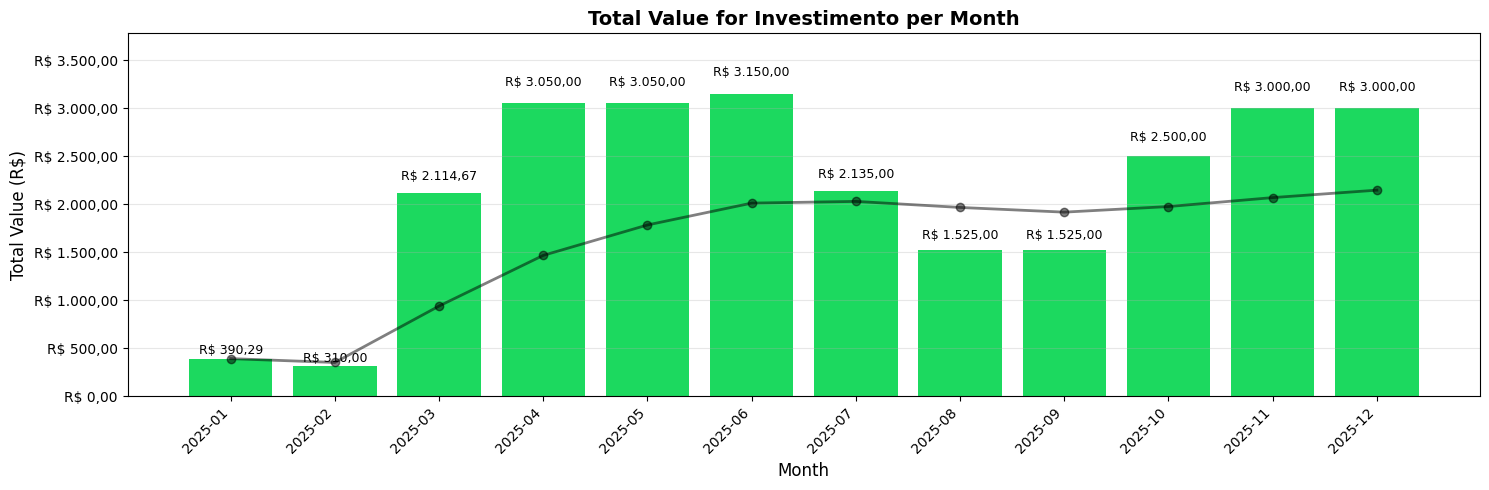

In [24]:
plot_expense_type('Fixo', df)
plot_expense_type('Parcelado', df)
plot_expense_type('Variavel', df)
plot_expense_type('Investimento', df)
